Importing Liabries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

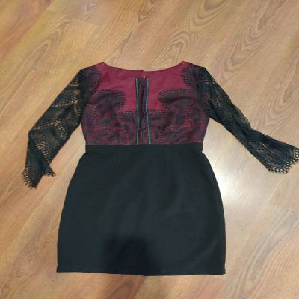

In [2]:
path = "C:/Users/Godwin/Documents/Workflow/MLZoomcamp/clothing-dataset-small/train/dress/"
name = '0d3cf39f-78f1-440e-9504-f510e75aff0b.jpg'
img_path = path + name
img = load_img(img_path, target_size = (299,299,3))
img

Using Xception Model

In [3]:
#preprocessing input
x = np.array(img) #turning image to arr
x = np.array([x]) #making the array 4-dimensional
x = preprocess_input(x)

model = Xception(weights = 'imagenet', input_shape = (299,299,3)) #loading the model
pred = model.predict(x) 
decode_predictions(pred)

1/1 [==============================] - 3s 3s/step


[[('n04525038', 'velvet', 0.66311246),
  ('n03866082', 'overskirt', 0.176301),
  ('n03534580', 'hoopskirt', 0.045907076),
  ('n03450230', 'gown', 0.01003972),
  ('n04599235', 'wool', 0.008342404)]]

Loading Data

In [4]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_data = train_gen.flow_from_directory('C:/Users/Godwin/Documents/Workflow/MLZoomcamp/clothing-dataset-small/train/', target_size= (299,299), batch_size = 32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_data = val_gen.flow_from_directory('C:/Users/Godwin/Documents/Workflow/MLZoomcamp/clothing-dataset-small/validation/', target_size= (299,299), batch_size = 32, shuffle = False)

test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_data = test_gen.flow_from_directory('C:/Users/Godwin/Documents/Workflow/MLZoomcamp/clothing-dataset-small/test/', target_size= (299,299), batch_size = 32, shuffle = False)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Found 372 images belonging to 10 classes.


In [5]:
train_data.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

Defining new model

In [ ]:
#Transfer learning
def make_model(learning_rate = 0.001):

    base_model = Xception(weights='imagenet', include_top=False, 
                      input_shape=(299,299,3))

    base_model.trainable = False
    input = keras.Input(shape = (299,299,3))
    base = base_model(input, training = False)
    pooling = keras.layers.pooling.GlobalAveragePooling2D()(base)
    output = keras.layers.Dense(10)(pooling)

    model = keras.Model(input, output)

    lr = learning_rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])

    return model

# Checking pointing
checkpoint = keras.callbacks.ModelCheckpoint(
                            'xception_v1_{epoch:02d}_{val_accuracy:.3f}.h5',
                              save_best_only = True,
                              monitor = 'val_accuracy',
                              mode = 'max')


Training the model

In [ ]:
learning_rate = 0.001
model = make_model(learning_rate = learning_rate)
history = model.fit(train_data, epochs=10, validation_data = val_data, callbacks=[checkpoint])

Visualizing Result

In [ ]:
plt.plot(history.history['accuracy'], label = 'Train')
plt.plot(history.history['val_accuracy'], label = 'Validation')

plt.xticks(np.arange(10))
plt.legend()

Hyperparameter Tuning

In [ ]:
scores = {}

for i in [0.0001, 0.001, 0.01,0.1]:
    model,hist = make_model(learing_rate = i)
    scores[i] = hist.history
    print()

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = ('validation=%S', lr))
    plt.plot(hist['accuracy'], label = ('train=%S', lr))

    plt.legend()

In [ ]:
del scores[0.01]
del scores[0.0001]

In [ ]:
for lr, hist in scores.items():
    plt.plot(hist['val_accuracy'], label = ('validation=%S', lr))
    plt.plot(hist['accuracy'], label = ('train=%S', lr))

    plt.legend()

Adding More Layers and dropout

In [ ]:
def make_model(learning_rate = 0.001, dense_lyr_size = 100, dropout_size = 0):


    base_model = Xception(weights='imagenet', include_top=False, 
                      input_shape=(299,299,3))
    base_model.trainable = False

    input = keras.Input(shape = (299,299,3))
    base = base_model(input, training = False)
    pooling = keras.layers.pooling.GlobalAveragePooling2D()(base)
    inner = keras.layers.Dense(dense_lyr_size, activation = 'relu')(pooling)
    regularization = keras.layers.Dropout(dropout_size)
    output = keras.layers.Dense(10)(inner)
    model = keras.Model(input, output)

    lr = learning_rate
    optimizer = keras.optimizers.Adam(learning_rate=lr)
    loss = keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer = optimizer, loss = loss, metrics = ['accuracy'])
    return model, history

In [ ]:
scores = {}
learning_rate = 0.001

for i in [10, 100, 1000]:
    model = make_model(learing_rate = learning_rate, dense_lyr_size=i)
    history = model.fit(train_data, epochs=10, validation_data = val_data)
    scores[i] = history.history
    print()

In [ ]:
for lr, hist in scores.items:
    plt.plot(hist['val_accuracy'], label = (lr))

Dropout

In [ ]:
scores = {}
learning_rate = 0.001
size = 10

for i in [0.2,0.4,0.6,0.8,1]:
    model = make_model(learing_rate = learning_rate, dense_lyr_size=size, dropout_size= = i)
    hist = model.fit(train_data, epochs=10, validation_data = val_data)
    scores[i] = hist.history
    print()

Data Augmentation

In [ ]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input, 
                                zoom_range = 0.1, shear_range = 10.0, vertical_flip = True)
train_data = train_gen.flow_from_directory('./clothing-dataset-small/train/', target_size= (299,299), batch_size = 32)

In [ ]:
scores = {}
learning_rate = 0.001
size = 10
drop = 0.2


model = make_model(learing_rate = learning_rate, dense_lyr_size=size, dropout_size = drop)
hist = model.fit(train_data, epochs=10, validation_data = val_data)
scores[i] = hist.history
print()

Loading Model

In [ ]:
model = keras.models.load_model("C:/Users/Godwin/Downloads/xception_v1_03_0.868.h5")

Using The Model

In [ ]:
model.evaluate(test_data)